In [5]:
#Importing Required Library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('/home/kzyrek/jupyter-project/youtube-top-100-songs-2025.csv')
df.head(5)


,title,fulltitle,description,view_count,categories,tags,duration,duration_string,live_status,thumbnail,channel,channel_url,channel_follower_count
0,ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT.\nDownload/stream: ht...,2009014557,Music,YG Entertainment;YG;와이지;K-pop;BLACKPINK;블랙핑크;블...,173,2:53,False,https://i.ytimg.com/vi_webp/ekr2nIex040/maxres...,ROSÉ,https://www.youtube.com/channel/UCBo1hnzxV9rz3...,19200000
1,"Lady Gaga, Bruno Mars - Die With A Smile (Offi...","Lady Gaga, Bruno Mars - Die With A Smile (Offi...",MAYHEM OUT NOW\nhttp://ladygaga.com \n \nListe...,1324833300,Music,Lady Gaga;Bruno Mars;Interscope;Pop,252,4:12,False,https://i.ytimg.com/vi/kPa7bsKwL-c/maxresdefau...,Lady Gaga,https://www.youtube.com/channel/UC07Kxew-cMIay...,29600000
2,Reneé Rapp - Leave Me Alone (Official Music Vi...,Reneé Rapp - Leave Me Alone (Official Music Vi...,"Listen to “BITE ME”, the new album from Reneé ...",2536628,Music,Reneé Rapp;Interscope Records;Pop,160,2:40,False,https://i.ytimg.com/vi/tiPWzFLiz4A/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000
3,Billie Eilish - BIRDS OF A FEATHER (Official M...,Billie Eilish - BIRDS OF A FEATHER (Official M...,Listen to HIT ME HARD AND SOFT: https://billie...,558329099,Music,Billie Eilish;Darkroom/Interscope Records;Alte...,231,3:51,False,https://i.ytimg.com/vi/V9PVRfjEBTI/maxresdefau...,Billie Eilish,https://www.youtube.com/channel/UCDGmojLIoWpXo...,56800000
4,Reneé Rapp - Mad (Official Music Video),Reneé Rapp - Mad (Official Music Video),"Listen to “BITE ME”, the new album from Reneé ...",2113548,Music,Reneé Rapp;Interscope Records;Pop,180,3:00,False,https://i.ytimg.com/vi/xkWQM3flsiY/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   title                   100 non-null    object
 1   fulltitle               100 non-null    object
 2   description             100 non-null    object
 3   view_count              100 non-null    int64 
 4   categories              100 non-null    object
 5   tags                    85 non-null     object
 6   duration                100 non-null    int64 
 7   duration_string         100 non-null    object
 8   live_status             100 non-null    bool  
 9   thumbnail               100 non-null    object
 10  channel                 100 non-null    object
 11  channel_url             100 non-null    object
 12  channel_follower_count  100 non-null    int64 
dtypes: bool(1), int64(3), object(9)
memory usage: 9.6+ KB


In [14]:
print('--- Statystyka---')
display(df.describe(include=[np.number]).round())

--- Statystyka---


,view_count,duration,channel_follower_count
count,1.000000e+02,100.0,100.0
mean,1.059103e+08,204.0,16120666.0
std,2.491132e+08,44.0,19800384.0
min,1.161000e+03,120.0,1.0
25%,1.852702e+07,173.0,613250.0
50%,3.798224e+07,194.0,6320000.0
75%,1.111073e+08,232.0,27600000.0
max,2.009015e+09,354.0,76200000.0


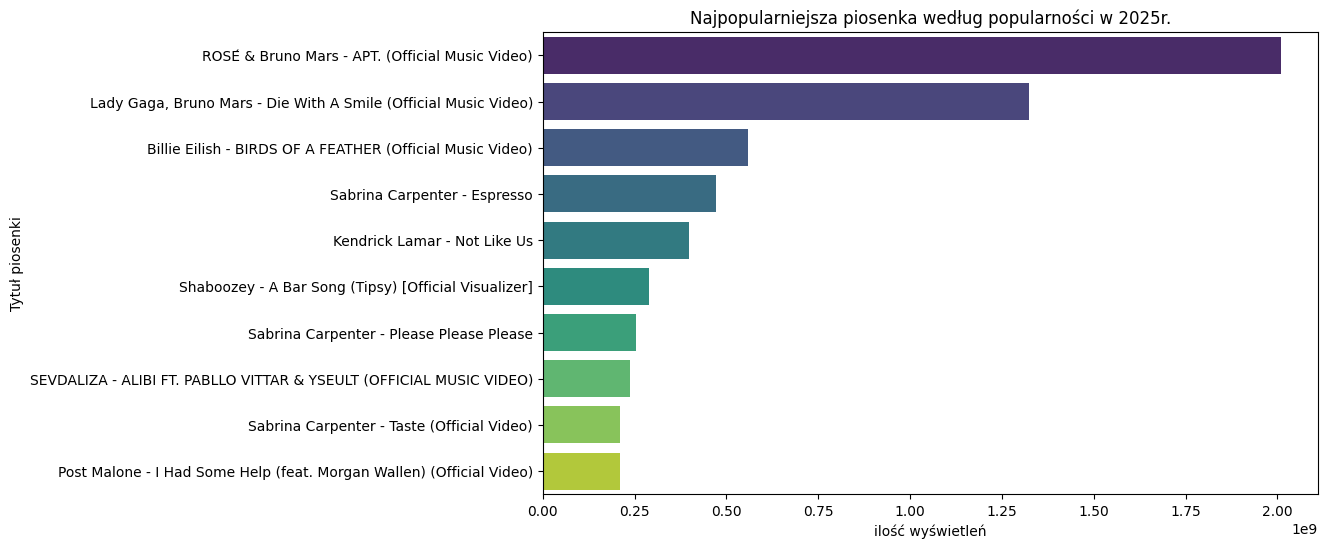

In [10]:
top_song_1 = df.sort_values(by='view_count', ascending=False).head(1)
top_song = df.sort_values(by='view_count', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_song, x='view_count', y='title', palette='viridis')
plt.title('Najpopularniejsza piosenka według popularności w 2025r.')
plt.xlabel('ilość wyświetleń')
plt.ylabel('Tytuł piosenki')
plt.show()

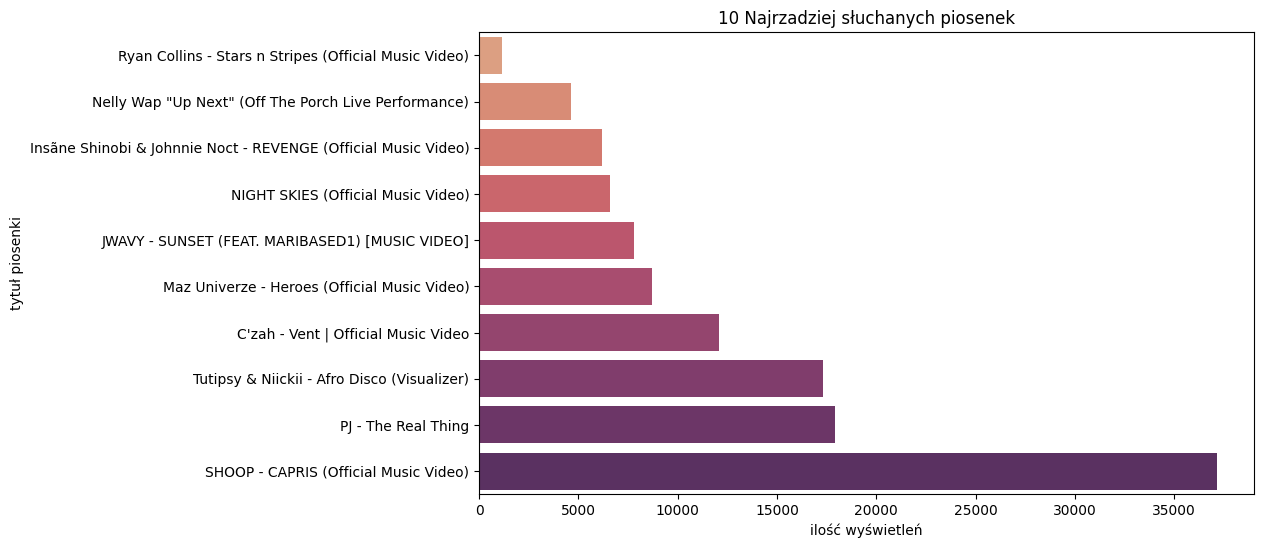

In [11]:
least_viewed_song_1 = df.sort_values(by='view_count', ascending=True).head(1)

least_viewed_song  = df.sort_values(by='view_count', ascending=True).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=least_viewed_song, x = 'view_count', y = 'title', palette='flare')
plt.title('10 Najrzadziej słuchanych piosenek')
plt.xlabel('ilość wyświetleń')
plt.ylabel('tytuł piosenki')
plt.show()

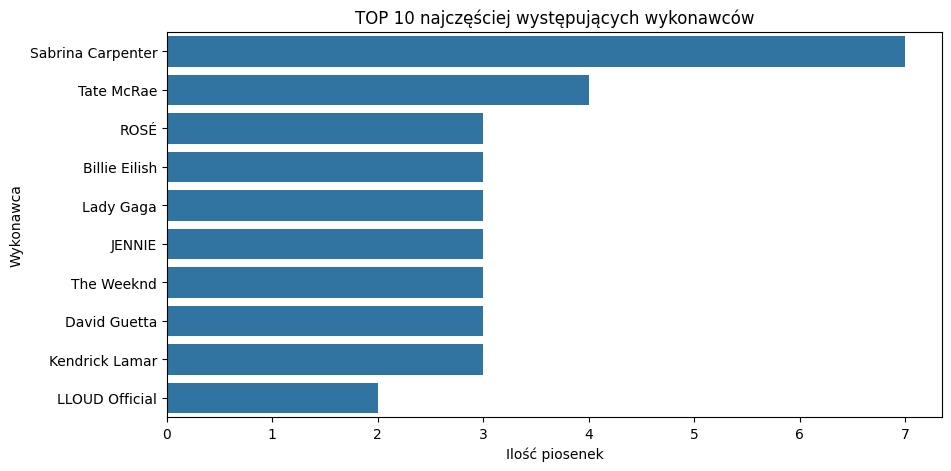

In [16]:
if 'channel' in df.columns:
    top_artists = df['channel'].value_counts().nlargest(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_artists.values, y=top_artists.index)
    plt.title('TOP 10 najczęściej występujących wykonawców')
    plt.xlabel('Ilość piosenek')
    plt.ylabel('Wykonawca')
    plt.show()

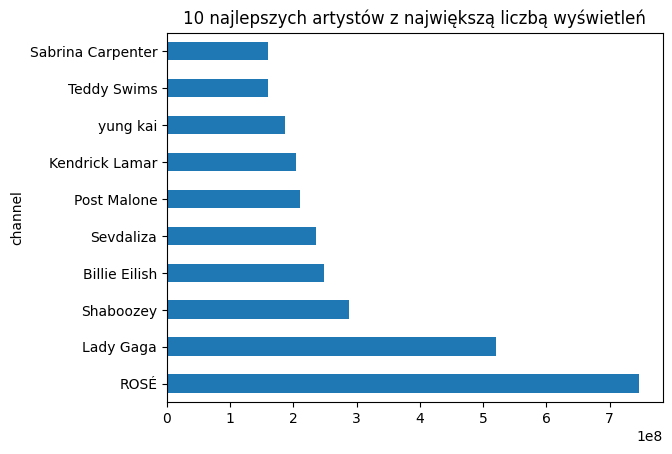

In [21]:
df.groupby('channel')['view_count'].mean().sort_values(ascending=False).head(10).plot(kind='barh', title='10 najlepszych artystów z największą liczbą wyświetleń')
plt.show()

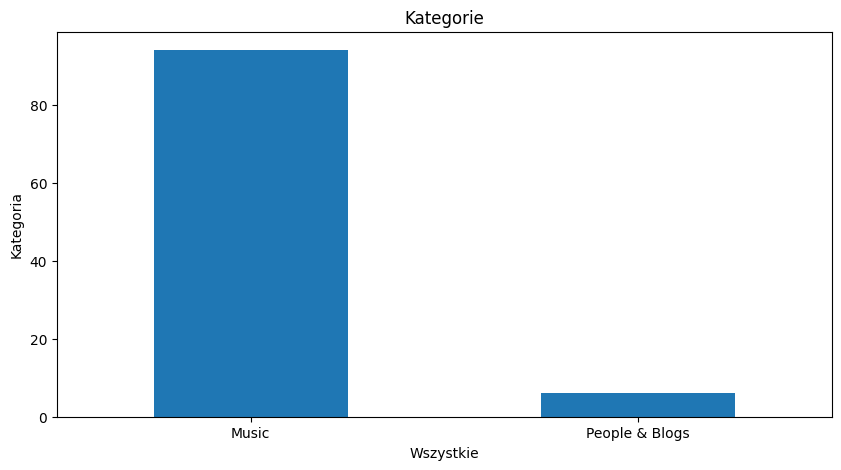

In [23]:
plt.figure(figsize=(10, 5))
df['categories'].value_counts().nlargest(5).plot(kind='bar', title='Kategorie', xlabel='Wszystkie', ylabel='Kategoria', rot=0)
plt.show()

NameError: name 'Counter' is not defined